In [1]:
import datetime as dt
from pathlib import Path

import numpy as np
import pandas as pd
import xarray as xr
import shapely

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import preprocessing as pp
import data_loading as data
import anomalies as an
import estimations as em
import visualize as vz

### Configuration of area and time

In [3]:
crs = data.CRS(32632)
small_ticino = {'bbox': shapely.box(489152.05, 5029502.98, 494849.52, 5036759.13).bounds,
                'crs': crs}

In [4]:
time_range = (dt.date(2017, 1, 1), dt.date(2022, 12, 31))

### Load data (will access copernicushub)

In [5]:
images = data.load_satellite_images(aoi=small_ticino, 
                                    time_range=time_range, 
                                    file_path=Path("small_test_data"), 
                                    show_progress=True)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 425/425 [00:00<00:00, 85754.52image/s]


### Example with single recording

In [6]:
dataset = em.create_dataset(images[0])

Warning 1: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


In [7]:
lai = em.estimate_lai(dataset)
cwc = em.estimate_cwc(dataset)
ccc = em.estimate_ccc(dataset)

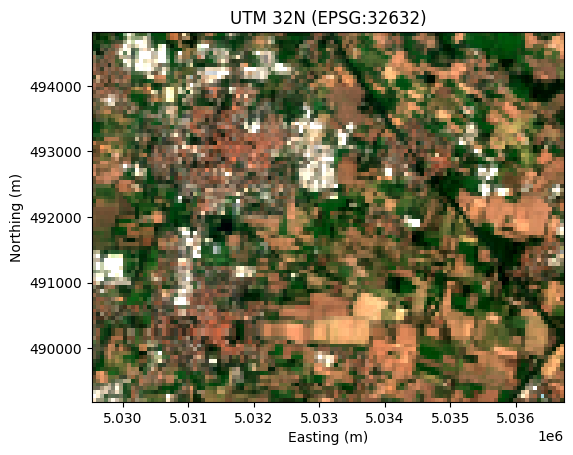

In [8]:
vz.plot_satellite_image(dataset, crs)

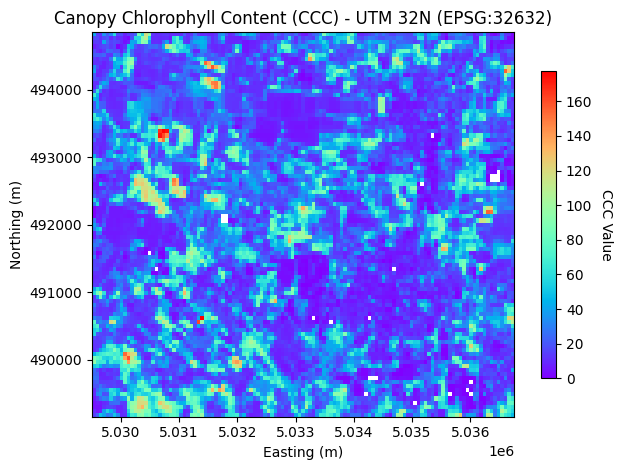

In [9]:
vz.plot_biophys_result(ccc, crs, "rainbow")

In [10]:
# currently no metadata is stored in the tiff
data.save_as_tiff(ccc, f"{images[0]['name']}_ccc.tiff")

### Anomaly example over whole dataset

In [ ]:
ccc = an.create_time_series(images, em.BiophysicalVariable.CCC)

In [12]:
interpolated = an.fill_gaps(ccc, "1D")

In [13]:
anomaly = an.compute_standardized_anomaly(interpolated, images[-1]['date'])

/Users/lorenzo/Desktop/Masterarbeit/github_repo/Masterarbeit/venv/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


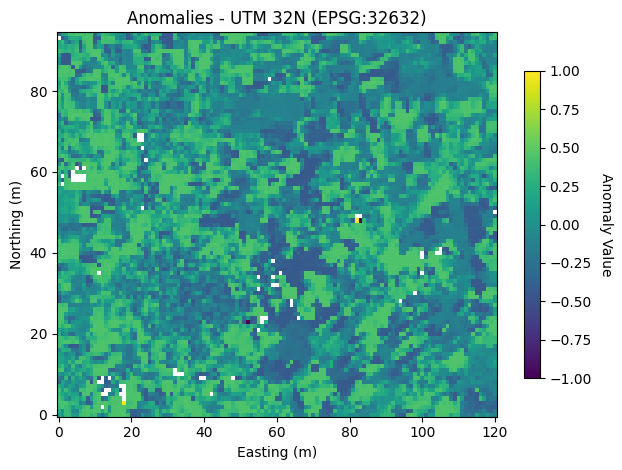

In [34]:
vz.plot_anomalies(anomaly, crs, cmap="viridis")